<a href="https://colab.research.google.com/github/NisthaSharma/BrainTumor/blob/main/Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.xception import Xception
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [299, 299]

train_path = 'drive/MyDrive/Brain_tumor_detection/brain/Train'
valid_path = 'drive/MyDrive/Brain_tumor_detection/brain/Test'

In [4]:
xception = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

83697664/83683744 [==============================] - 0s 0us/step


In [6]:
for layer in xception.layers:
    layer.trainable = False

In [7]:
folders = glob('drive/MyDrive/Brain_tumor_detection/brain/Train/*')

In [8]:
x = Flatten()(xception.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs= xception.input, outputs=prediction)

In [10]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [13]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory('drive/MyDrive/Brain_tumor_detection/brain/Train',
                                                 target_size = (299, 299),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2924 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory('drive/MyDrive/Brain_tumor_detection/brain/Test',
                                            target_size = (299, 299),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 200 images belonging to 2 classes.


In [16]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
92/92 [==============================] - 1080s 12s/step - loss: 0.8964 - accuracy: 0.8800 - val_loss: 0.6159 - val_accuracy: 0.9450
Epoch 2/10
92/92 [==============================] - 1060s 12s/step - loss: 0.4164 - accuracy: 0.9439 - val_loss: 0.5038 - val_accuracy: 0.8700
Epoch 3/10
92/92 [==============================] - 1073s 12s/step - loss: 0.3387 - accuracy: 0.9569 - val_loss: 0.2476 - val_accuracy: 0.9750
Epoch 4/10
92/92 [==============================] - 1071s 12s/step - loss: 0.2735 - accuracy: 0.9679 - val_loss: 0.1596 - val_accuracy: 0.9800
Epoch 5/10
92/92 [==============================] - 1070s 12s/step - loss: 0.2677 - accuracy: 0.9685 - val_loss: 0.8760 - val_accuracy: 0.9350
Epoch 6/10
92/92 [==============================] - 1092s 12s/step - loss: 0.3712 - accuracy: 0.9603 - val_loss: 0.0976 - val_accuracy: 0.9850
Epoch 7/10
92/92 [==============================] - 1074s 12s/step - loss: 0.1507 - accuracy: 0.9785 - val_loss: 0.0538 - val_accuracy: 0.9900

In [19]:
test_generator = test_datagen.flow_from_directory(
                                            'drive/MyDrive/Brain_tumor_detection/brain_tumor_dataset',
                                            target_size = (299, 299),
                                            batch_size = 32,
                                            class_mode = 'categorical'
)

Found 253 images belonging to 2 classes.


In [20]:
scores = model.evaluate_generator(test_generator,len(test_generator)) #1514 testing images
print("Accuracy = ", scores[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Accuracy =  0.9367588758468628


In [21]:
import tensorflow as tf

from keras.models import load_model

model.save('model_xception')

INFO:tensorflow:Assets written to: model_xception/assets


In [22]:
!zip -r ./file_xception.zip ./model_xception/

  adding: model_xception/ (stored 0%)
  adding: model_xception/assets/ (stored 0%)
  adding: model_xception/keras_metadata.pb (deflated 95%)
  adding: model_xception/variables/ (stored 0%)
  adding: model_xception/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: model_xception/variables/variables.index (deflated 79%)
  adding: model_xception/saved_model.pb (deflated 92%)


In [23]:
from google.colab import files
files.download("./file_xception.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

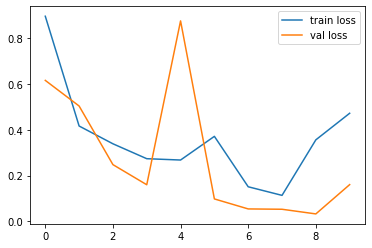

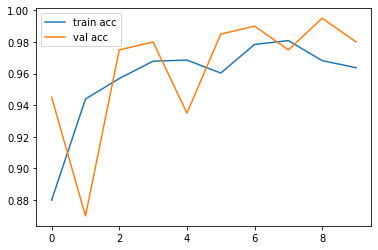

<Figure size 432x288 with 0 Axes>

In [24]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')